In [6]:
import tclab

TCLab = tclab.setup(connected=False, speedup=10)

# display UI
display(stop)
display(heater1)
display(heater2)

with TCLab() as lab:
    for t in tclab.clock(100, 10):
        print(t, heater1.value, heater2.value)

ToggleButton(value=True, button_style='danger', description='Stop')

FloatSlider(value=46.0, description='Heater 1')

FloatSlider(value=55.8, description='Heater 2')

TCLab version 0.4.9
Simulated TCLab
0 46.0 55.8
20.05 46.0 55.8
40.07 46.0 55.8
60.1 46.0 55.8
80.04 46.0 55.8
100.01 46.0 55.8
TCLab Model disconnected successfully.


In [9]:
import tclab

# import threading library
import threading

TCLab = tclab.setup(connected=False, speedup=2)

# display UI
display(stop)
display(heater1)
display(heater2)

# create a function that will be passed to a thread
def work(stop, heater1, heaters):
    with TCLab() as lab:
        for t in tclab.clock(60, 5):
            print(t, heater1.value, heater2.value)
            
# create the thread
thread = threading.Thread(target=work, args=(stop, heater1, heater2))

# start the thread
thread.start()

ToggleButton(value=True, button_style='danger', description='Stop')

FloatSlider(value=71.2, description='Heater 1')

FloatSlider(value=22.9, description='Heater 2')

TCLab version 0.4.9
Simulated TCLab
0 71.2 71.2
5.01 71.2 71.2
10.01 39.7 39.7
15.02 39.7 39.7
20.0 65.2 65.2
25.01 65.2 65.2
30.03 80.6 80.6
35.02 81.4 81.4
40.01 81.4 81.4
45.07 81.4 81.4
50.07 78.8 78.8
55.04 38.5 38.5
60.05 37.7 37.7
TCLab Model disconnected successfully.


Add stop feature

In [24]:
TCLab = tclab.setup(connected=False, speedup=2)

stop = widgets.ToggleButton(value=False, description="Stop", button_style="danger")
heater1 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 1")
heater2 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 2")

# create a function that will be passed to a thread
def work(stop, heater1, heaters):
    with TCLab() as lab:
        for t in tclab.clock(60, 5):
            print(t, heater1.value, heater2.value)
            if stop.value:
                break
            
# create the thread
thread = threading.Thread(target=work, args=(stop, heater1, heater2))

# display UI
display(stop)
display(heater1)
display(heater2)

# start the thread
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop')

FloatSlider(value=50.0, description='Heater 1')

FloatSlider(value=50.0, description='Heater 2')

TCLab version 0.4.9
Simulated TCLab
0 50.0 50.0
5.01 50.0 50.0


ToggleButton(value=False, button_style='danger', description='Stop')

FloatSlider(value=50.0, description='Heater 1')

FloatSlider(value=50.0, description='Heater 2')

TCLab version 0.4.9
Simulated TCLab


<IPython.core.display.Javascript object>


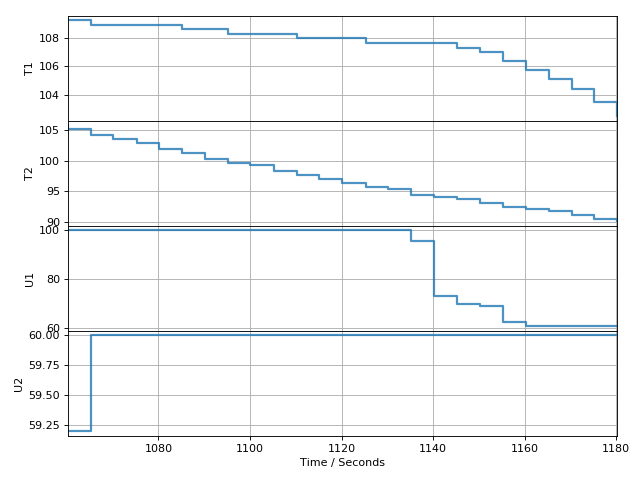

In [46]:
TCLab = tclab.setup(connected=False, speedup=2)

stop = widgets.ToggleButton(value=False, description="Stop", button_style="danger")
heater1 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 1")
heater2 = widgets.FloatSlider(value=50, min=0, max=100, description="Heater 2")

# create a function that will be passed to a thread
def work(stop, heater1, heaters):
    with TCLab() as lab:
        sources = [
            ('T1', lambda: lab.T1),
            ('T2', lambda: lab.T2),
            ('U1', lambda: lab.U1),
            ('U2', lambda: lab.U2),
        ]
        h = tclab.Historian(sources)
        p = tclab.Plotter(h)
        lab.P1 = 255
        lab.P2 = 255
        for t in tclab.clock(1200, 5):
            lab.U1 = heater1.value
            lab.U2 = heater2.value
            p.update(t)
            if stop.value:
                break
            
# create the thread
thread = threading.Thread(target=work, args=(stop, heater1, heater2))

# display UI
display(stop)
display(heater1)
display(heater2)

# start the thread
thread.start()

In [35]:
# decision variables Q1, Q2, T1, T2, z1p, z1m, z2p, z2m

Q_ps = 10
Q1_max = 3.3
Q2_max = 3.3
T_ub = 100

def feedforward(SP1, SP2, Ta=20):
    c = np.array([0, 0, 0, 0, 1, 1, 1, 1])
    A_ub = np.array([
        [1, 1, 0, 0, 0, 0, 0, 0]
    ])
    b_ub = np.array([Q_ps])
    A_eq = np.array([
        [-1, 0, (Ua + Ub), -Ub, 0, 0, 0, 0],
        [0, -1, -Ub, (Ua + Ub), 0, 0, 0, 0],
        [0, 0, 1, 0, -1, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, -1, 1]
    ])
    b_eq = np.array([Ua*Ta, Ua*Ta, SP1, SP2])
    bounds = [(0, Q1_max), (0, Q2_max), (Ta, T_ub), (Ta, T_ub), (0, None), (0, None), (0, None), (0, None)]
    results = scipy.optimize.linprog(c, A_ub, b_ub, A_eq, b_eq, bounds)
    Q1, Q2, T1, T2, _, _, _, _ = results.x
    return [Q1, Q2, T1, T2]

Q1, Q2, T1, T2 = feedforward(103, 56)

<IPython.core.display.Javascript object>


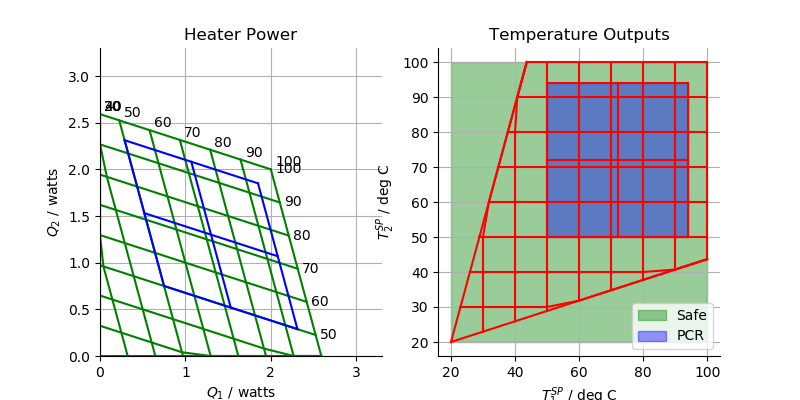

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

Ua = 0.0250
Ub = 0.0105
Ta = 20.0


Q = np.linspace(0, 2.5, 6)
T = np.linspace(Ta, T_ub, 9)
Tpcr = np.array([50, 72, 94])

fig, ax = plt.subplots(1, 2, figsize=(8,4))

for T1 in T:
    T2 = T
    #ax[1].plot([T1]*len(T2), T2, 'b')
    x = np.array([feedforward(T1, t2, Ta) for t2 in T2])
    Q1 = x[:,0]
    Q2 = x[:,1]
    T1 = x[:,2]
    T2 = x[:,3]
    ax[1].plot(T1, T2, 'r')
    ax[0].plot(Q1, Q2, 'g')
    xtext = Q1[-1]+0.05
    ytext = Q2[-1]
    if xtext > 0 and ytext > 0:
        ax[0].text(xtext, ytext, "{0:0.0f}".format(T1[0]), ha="left", va="bottom")

for T2 in T:
    T1 = T
    #ax[1].plot(T1, [T2]*len(T1), 'b')
    x = np.array([feedforward(t1, T2, Ta) for t1 in T1])
    Q1 = x[:,0]
    Q2 = x[:,1]
    T1 = x[:,2]
    T2 = x[:,3]
    ax[1].plot(T1, T2, 'r')
    ax[0].plot(Q1, Q2, 'g')
    xtext = Q1[-1]+0.05
    ytext = Q2[-1]
    if xtext > 0 and ytext > 0:
        ax[0].text(xtext, ytext, "{0:0.0f}".format(T2[0]), ha="left", va="center")
        
for T1 in Tpcr:
    T2 = Tpcr
    #ax[1].plot([T1]*len(T2), T2, 'b')
    x = np.array([feedforward(T1, t2, Ta) for t2 in T2])
    Q1 = x[:,0]
    Q2 = x[:,1]
    T1 = x[:,2]
    T2 = x[:,3]
    ax[1].plot(T1, T2, 'r')
    ax[0].plot(Q1, Q2, 'b')

for T2 in Tpcr:
    T1 = Tpcr
    #ax[1].plot(T1, [T2]*len(T1), 'b')
    x = np.array([feedforward(t1, T2, Ta) for t1 in T1])
    Q1 = x[:,0]
    Q2 = x[:,1]
    T1 = x[:,2]
    T2 = x[:,3]
    ax[1].plot(T1, T2, 'r')
    ax[0].plot(Q1, Q2, 'b')     

ax[0].set_xlim(0, 3.3)
ax[0].set_ylim(0, 3.3)
ax[0].set_title("Heater Power")
ax[0].set_xlabel("$Q_1$ / watts")
ax[0].set_ylabel("$Q_2$ / watts")

ax[1].set_title("Temperature Outputs")
ax[1].set_xlabel("$T_1^{SP}$ / deg C")
ax[1].set_ylabel("$T_2^{SP}$ / deg C")
ax[1].fill_between([Ta, T_ub], [Ta, Ta], [T_ub, T_ub], color='g', alpha=0.4, label='Safe')
ax[1].fill_between([50, 94], [50, 50], [94, 94], color='b', alpha=0.4, label='PCR')
ax[1].legend()

for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.grid(True)